# Logistic Regression, usage for Breast cancer detection.
**Thanks to:** [Breast Cancer Wisconsin (Original)](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original) for the dataset.

# 1. Dataset Description

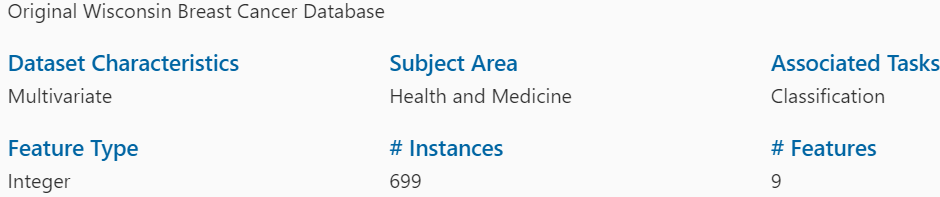

## 1.2 Citations/Acknowledgements
This **breast cancer databases** was obtained from the **University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.**

## 1.3 Variable Table

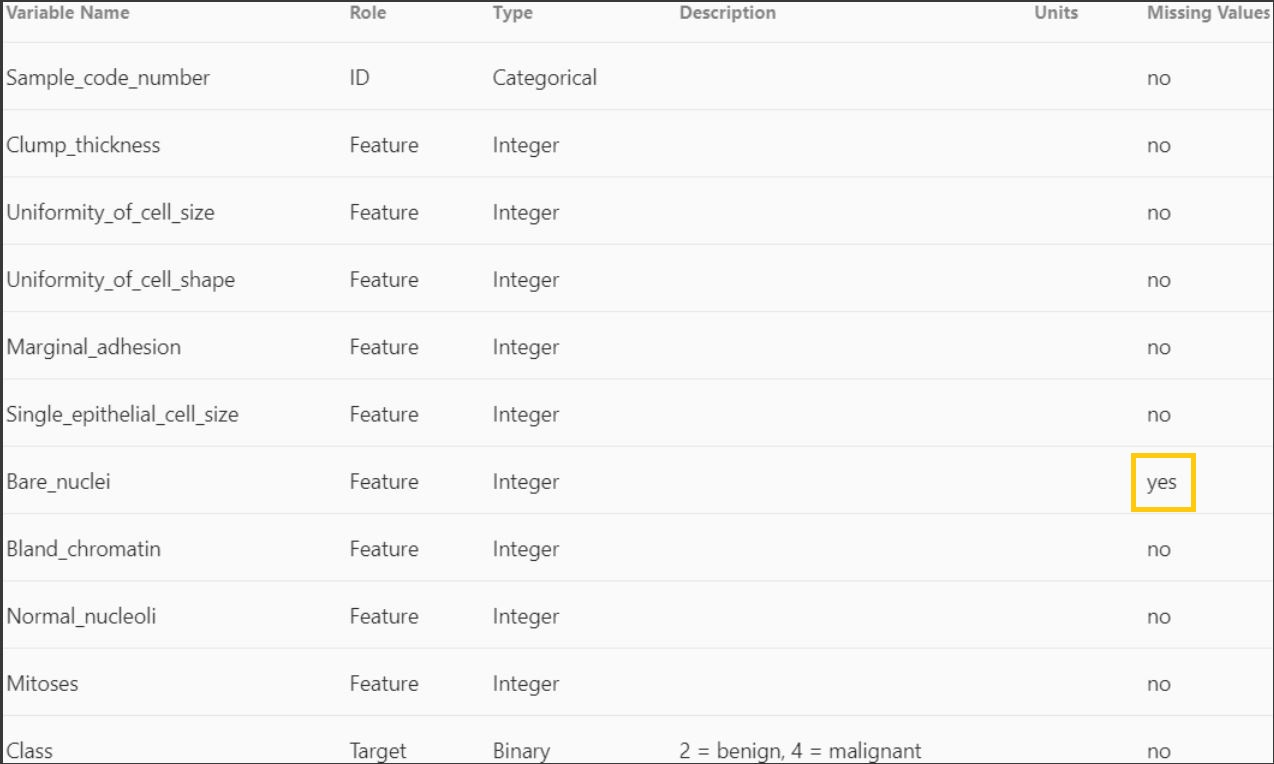

# 1.4 Purposes / Objective
*The motivation of this classification program is to identify (Predict) whether the cancer (tumor) is [**benign=2 or malignant=4**]*

## 1.5 Definitions and Differences
A **benign tumor** has distinct, smooth, regular borders.
<br>A **malignant tumor** has irregular borders and grows faster than a benign tumor.
<br>A **malignant tumor** can also spread to other parts of your body.
<br>A **benign tumor** can become quite large, but it will not invade nearby tissue or spread to other parts of your body.

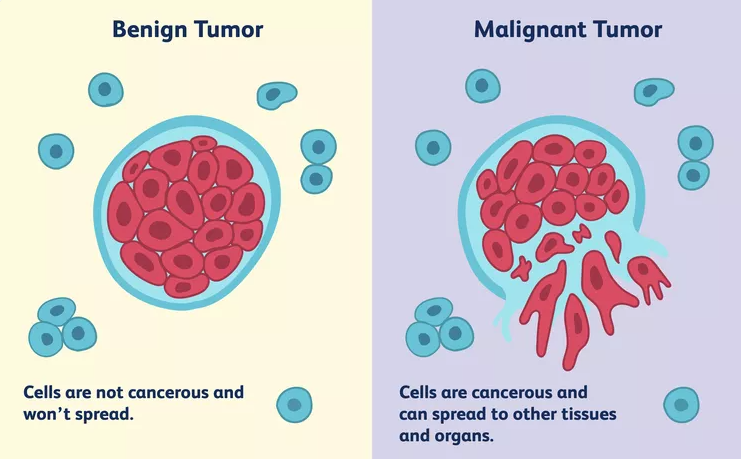

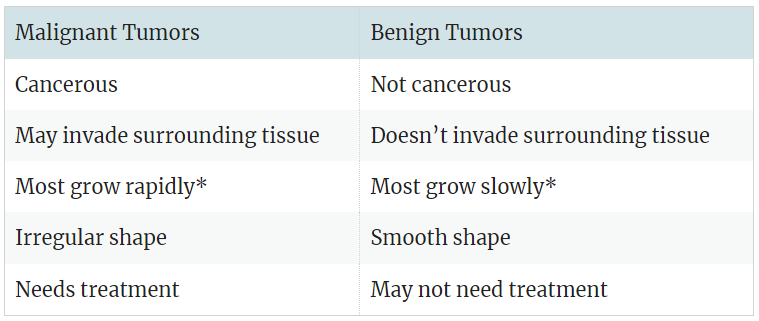

*Image, description & differences credit goes to: https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240*

# 2. Import libraries

In [1]:
# import pandas, numpy, sci-kit learn libraries
import pandas as pd
import numpy as np

# 3. Load dataset

In [2]:
# load the raw format of the ".csv" file directly from GitHub
# can load from drive also everytime, once you restart the kernel.
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ex16_breast-cancer-wisconsin_data.csv"
df = pd.read_csv(url)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# 4. Dataset EDA (Exploratory Data Analysis)
* *Distribute the dataset into **independent and dependent** features.*
* **Independent features :** *Consider the data from column number **1st (Clump Thickness)** till to the column number **9th (Mitoses),** which is one before the* **last column (Class)**
* *Here, let's ignore the column number **0th (Sample code number)** and **(-1)** means the last column* **(Class).**
* **Dependent features :** *Consider the data from* **(-1) last column (Class)**

## 4.1 Check the shape matrix (rows & columns) and data-types of the dataset

In [3]:
# check & print the shape matrix (rows & columns) of dataset
print('\nShape of the dataset '.ljust(50, '.'),'=>', df.shape)

# check & print the datatypes of every column of the dataset
print(f"\nDatatypes of the dataset ".ljust(50, '.'),'=>\n', df.dtypes)


Shape of the dataset ............................ => (699, 11)

Datatypes of the dataset ........................ =>
 Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


## 4.2 Check for the count of 'nan' data point in the dataset

In [4]:
# check the nan/null data of dataset
print(f"\nTotal number of 'nan' entries in the dataset ".ljust(50, ' '),'=>', \
  df.isna().sum().count())


Total number of 'nan' entries in the dataset      => 11


In [5]:
if(df.isna().sum().count()):
  print("\nIf the dataset have 'nan', then either need to remove or replace them with some other values.\n")


If the dataset have 'nan', then either need to remove or replace them with some other values.



## 4.3 Dataset exploration and investigation either for 'NaN' or 'Null' datapoint

### ```{column: df[~df[column].apply(is_numeric)][column].tolist() for column in df.columns if not df[~df[column].apply(is_numeric)][column].empty}```

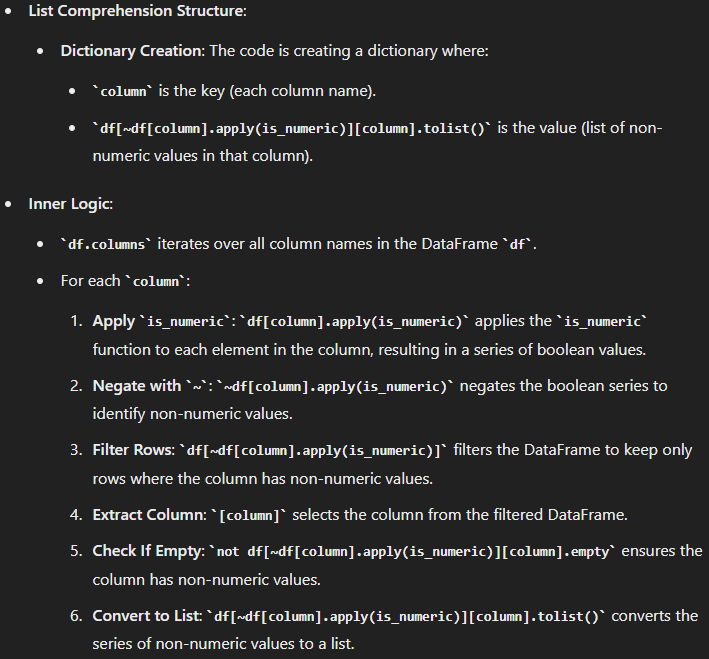

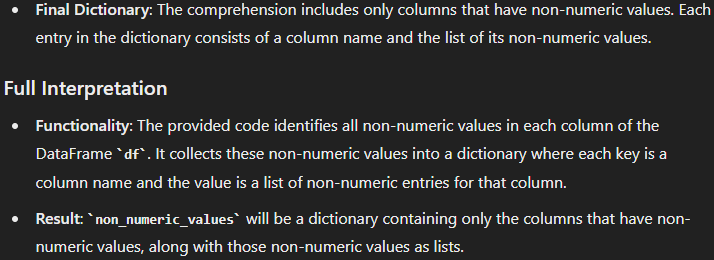

### ```if not df[~df[column].apply(is_numeric)][column].empty```

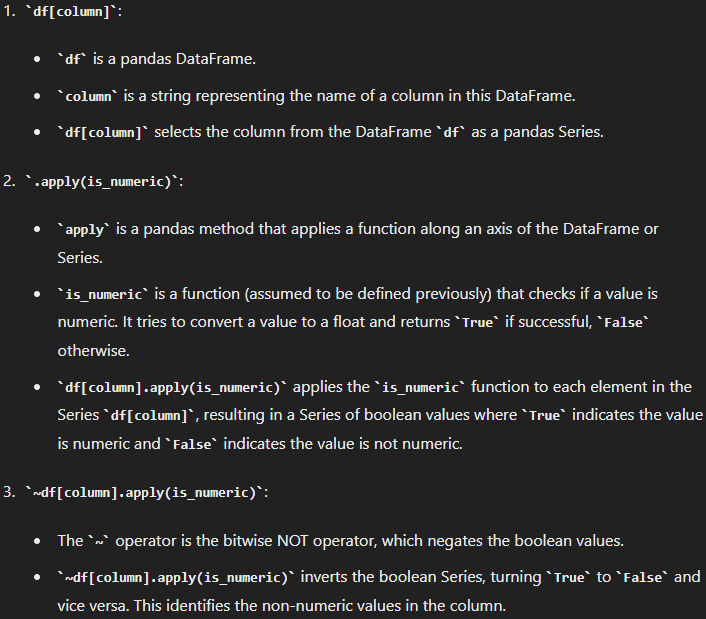

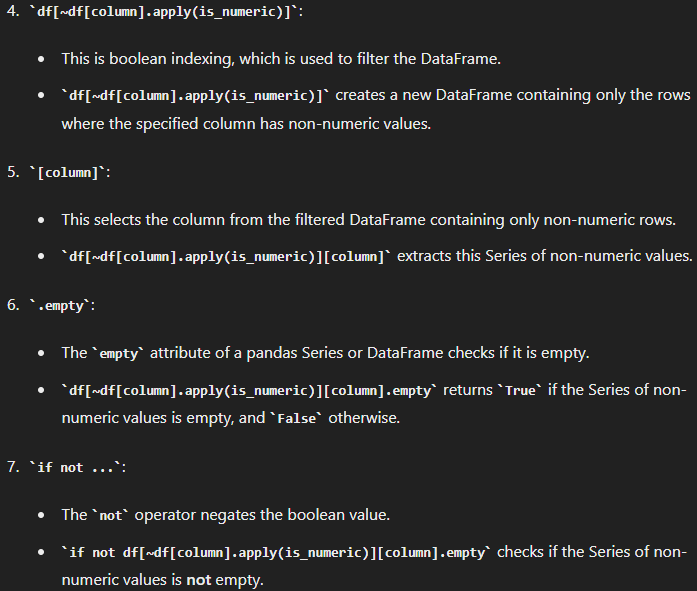

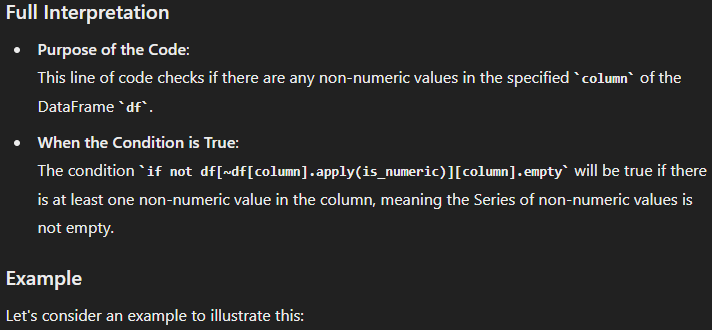

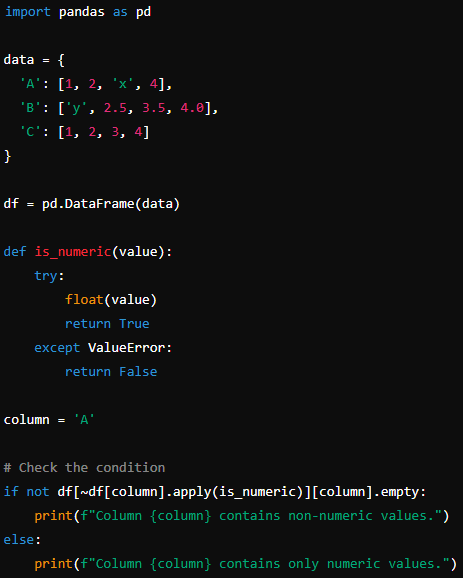

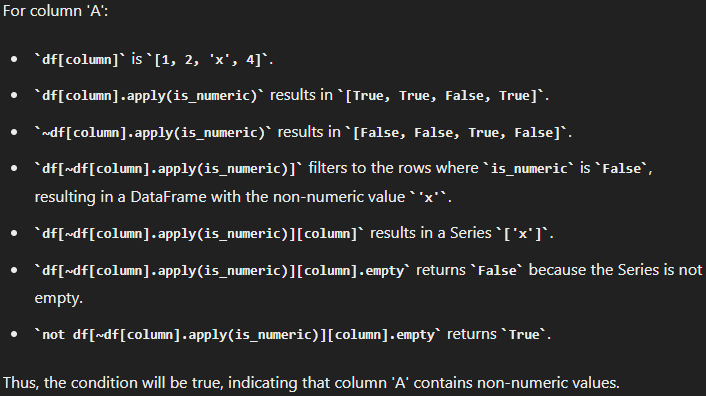

### ```df[~df[column].apply(is_numeric)][column].tolist()```

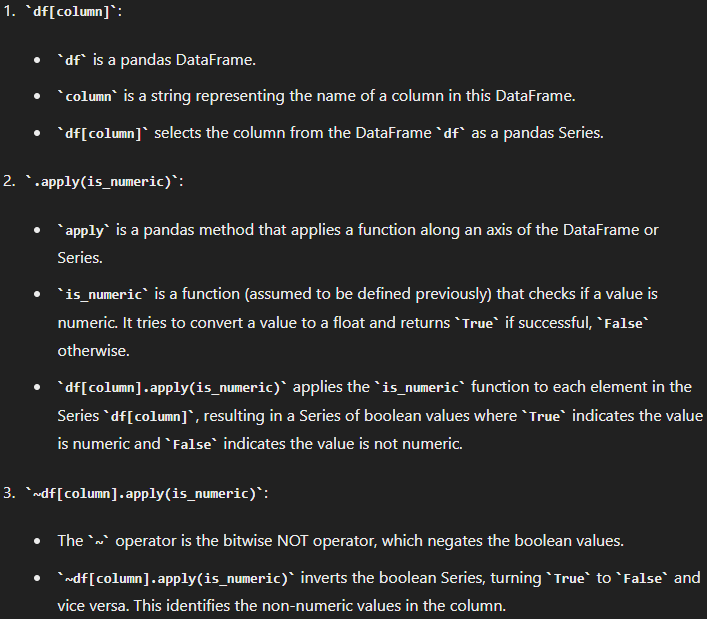

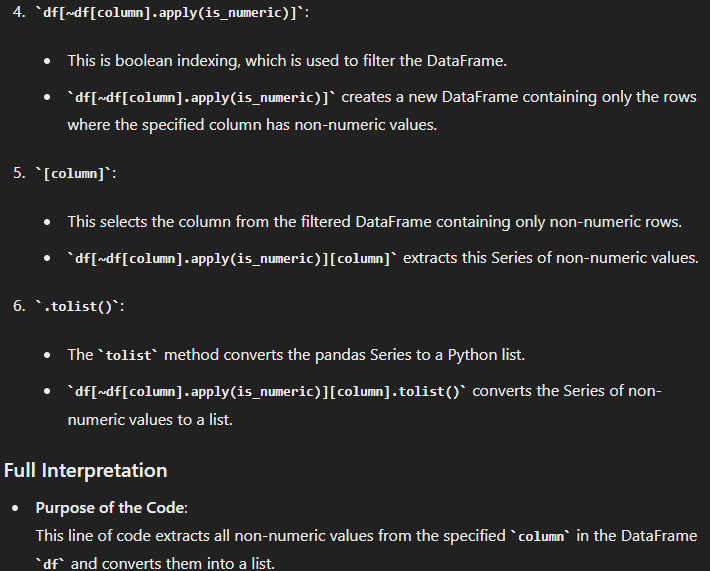

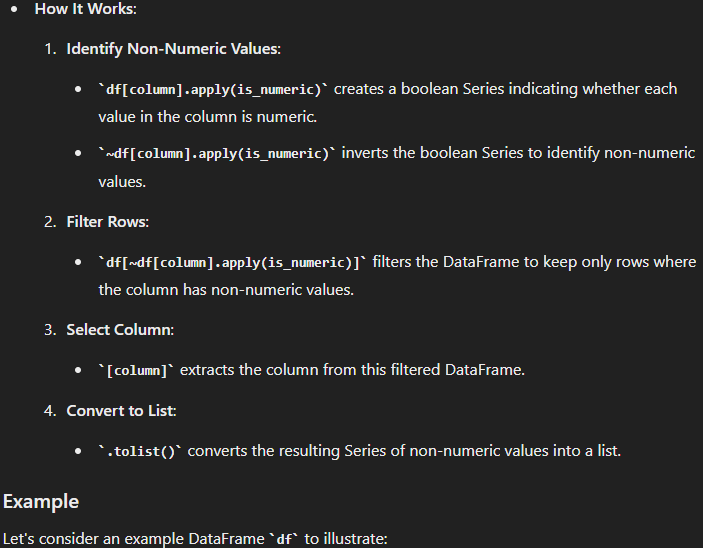

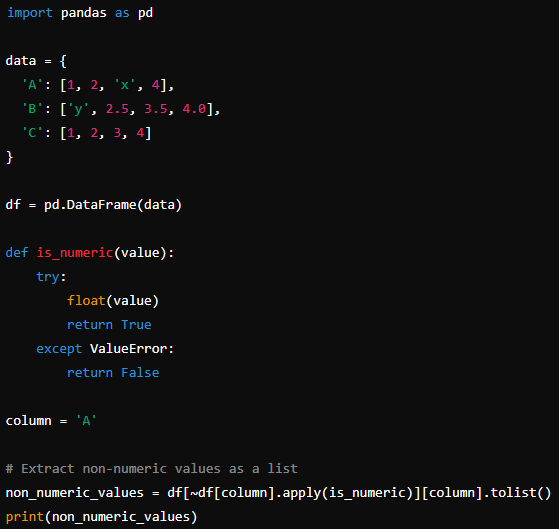

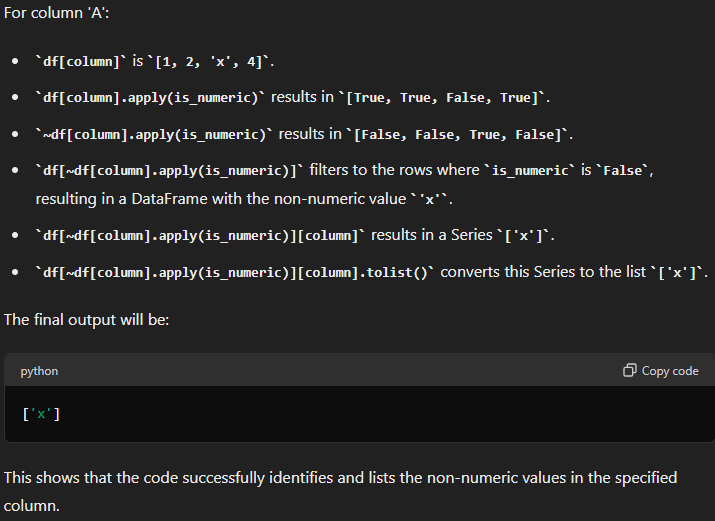

In [6]:
# Function to check if a given 'value' can be convert to a floating-point number.
# If the 'value' can be successfully convert to a float, then it means that 'value' is numeric.
# If it can then function returns 'True'; otherwise, it returns 'False'.
def is_numeric(value):
  """
  Checks if all elements in the given list are numeric.
  Args:
    data_list (list): The list to be checked for numeric values.
  Returns:
    bool: 'True' if all elements in the list are 'numeric', 'False' otherwise.
  """
  # 'try' Block: Attempts to convert 'value' to a float.
  try:
    float(value)    # Convert a string or number to a floating point number, if possible.
    return True     # If Successful: Returns 'True'.
  # 'except ValueError': If a 'ValueError' is raised (indicating 'value' cannot be converted to a float), returns 'False'.
  except ValueError:
    return False

# list comprehension of dictionary to find non-numeric values for each column
non_numeric_values = {
  column: df[~df[column].apply(is_numeric)][column].tolist() for column in df.columns if not df[~df[column].apply(is_numeric)][column].empty
}
# non_numeric_values = {
#     column: df[column].unique() for column in df.columns if not is_numeric(df[column].unique())
# }

# items : iterates the key-value pair as tuple from dictionary
for column, values in non_numeric_values.items():
  print(f"Column '{column}' has non-numeric values: {values}")

Column 'Bare Nuclei' has non-numeric values: ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


In [7]:
# filter the column of dataset which is neither with 'float' nor with 'int'
# check whether the datatype of any column in the dataset is numeric or
# non-numeric ('object'). Here, we are catching the column having non-numeric
# ('object') datatype.
object_columns = df.select_dtypes(include='object').columns

if len(object_columns) > 0:
  print("\nThere is a column with the 'object' datatype in the DataFrame.\n", \
    object_columns)
else:
  print("\nThere are no columns with the datatype 'object' in the DataFrame.\n")


There is a column with the 'object' datatype in the DataFrame.
 Index(['Bare Nuclei'], dtype='object')


In [8]:
print(column)
print(values)
print(values[0])

Bare Nuclei
['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']
?


In [9]:
# print(df['Bare Nuclei'].unique().sum())
# print(df['Bare Nuclei'].unique())
# print(df['Bare Nuclei'].is_unique)
# print(df['Bare Nuclei'].nunique())
# print(df['Bare Nuclei'].value_counts())

# print(df['Bare Nuclei'].values)
# print(df['Bare Nuclei'].count())

# print the number of count and values of each unique data of the column having
# 'object' datatype
print(f"\nnumber of count and values of each unique data of the column : \"{object_columns[0]}\"\n")
print(df[object_columns[0]].value_counts())


number of count and values of each unique data of the column : "Bare Nuclei"

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64


## 4.4 Data cleaning: Remove non-numeric values of features and replace with mean of feature column

#### [Check if All Columns are Numeric](https://saturncloud.io/blog/how-to-check-if-a-pandas-dataframe-contains-only-numeric-columns/)
To check if all columns are numeric, we can use the **apply()** function with the 
<br>**pd.to_numeric()** function, which attempts to convert a pandas object to a numeric dtype.

#### [pandas.to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)
Convert argument to a numeric type.
<br>The default return dtype is **float64 or int64** depending on the data supplied. Use the **downcast** parameter to obtain *other dtypes.*

#### [pandas.DataFrame.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
Cast a pandas object to a specified **dtype.**

In [10]:
# replace 'values[0] = '?' with np.nan in df[column] = df['Bare Nuclei']
df[column] = df[column].replace(values[0], np.nan)

# convert df[column] = df['Bare Nuclei'] to numeric (this will convert np.nan to NaN)
df[column] = pd.to_numeric(df[column])

mean_value = df[column].mean()
# replace np.nan with mean of the column
# df[column].fillna(df[column].mean(), inplace=True)
df[column] = df[column].fillna(mean_value)

# convert df[column] = df['Bare Nuclei'] to dtype=int64
df[column] = df[column].astype('int64')

mean_value

3.5446559297218156

In [11]:
df.isna().sum().count()

11

### No need of below source code, cause can utilise the above same code
#### *this is just to verify or confirm, dataset only contains non-numeric values.*

In [12]:
'''
def is_numeric(value):
  # 'try' Block: Attempts to convert 'value' to a float.
  try:
    float(value)    # Convert a string or number to a floating point number, if possible.
    return True     # If Successful: Returns 'True'.
  # 'except ValueError': If a 'ValueError' is raised (indicating 'value' cannot be converted to a float), returns 'False'.
  except ValueError:
    return False

# list comprehension of dictionary to find non-numeric values for each column
non_numeric_values = {
  column: df[~df[column].apply(is_numeric)][column].tolist() for column in df.columns if not df[~df[column].apply(is_numeric)][column].empty
}

for column, values in non_numeric_values.items():
  print(f"Column '{column}' has non-numeric values: {values}")
'''

'\ndef is_numeric(value):\n  # \'try\' Block: Attempts to convert \'value\' to a float.\n  try:\n    float(value)    # Convert a string or number to a floating point number, if possible.\n    return True     # If Successful: Returns \'True\'.\n  # \'except ValueError\': If a \'ValueError\' is raised (indicating \'value\' cannot be converted to a float), returns \'False\'.\n  except ValueError:\n    return False\n\n# list comprehension of dictionary to find non-numeric values for each column\nnon_numeric_values = {\n  column: df[~df[column].apply(is_numeric)][column].tolist() for column in df.columns if not df[~df[column].apply(is_numeric)][column].empty\n}\n\nfor column, values in non_numeric_values.items():\n  print(f"Column \'{column}\' has non-numeric values: {values}")\n'

# 5. Dataset distribution
## 5.1 Distributing the dataset into 'training and test (validation)' set

In [13]:
# Drop the feature columns "Sample code number" having "id number" and "Class", since dependent feature.
# X = df.drop(['Sample code number', 'Class'], axis=1)
X = df.iloc[:, 1:-1]
print(f"Independent features (X) : \n {X}")

# y = df['Class']
y = df.iloc[:, -1]
print(f"Dependent features (y) : \n {y}")

Independent features (X) : 
      Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0 

## 5.2 Filtering dataset into "independent and dependent" features values.

#### [pandas.DataFrame.values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html#pandas.DataFrame.values)
Return a Numpy representation of the DataFrame.

In [14]:
X = X.values
print(f"\nIndependent features (X) values : \n {X}")
y = y.values
print(f"\nDependent features (y) values : \n {y}")


Independent features (X) values : 
 [[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]

Dependent features (y) values : 
 [2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4
 2 4 4 2 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4
 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2
 4 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4
 2 4 4 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4
 4 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 4 4 2 2 2
 2 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4
 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 2 4 2 2 4 2 4 4 4 2 2
 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2

## 5.3 Spliting dataset into 'training' and 'test(validation)' set using 'sci-kit learn's' [train_test_split] method

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
print(f"Independent features (X) training set : \n {X_train}")
print(f"Independent features (X) test set : \n {X_test}")
print(f"Dependent features (y) training set : \n {y_train}")
print(f"Dependent features (y) test set : \n {y_test}")

Independent features (X) training set : 
 [[10  4  4 ...  2  3  1]
 [ 9 10 10 ...  3  3  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [ 4  1  1 ...  1  1  1]
 [ 5  1  1 ...  2  1  1]
 [ 1  1  1 ...  1  1  1]]
Independent features (X) test set : 
 [[4 1 2 ... 1 1 1]
 [4 2 2 ... 2 1 1]
 [6 6 6 ... 7 8 1]
 ...
 [7 5 6 ... 5 3 1]
 [3 1 1 ... 2 1 1]
 [1 1 1 ... 2 1 2]]
Dependent features (y) training set : 
 [4 4 2 2 2 2 2 4 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2 4 2
 4 4 2 4 2 4 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 4 4 2
 4 4 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2 2 2
 2 2 2 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 4 4 4 2 4 2 2
 2 4 4 4 2 2 4 2 2 2 4 4 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 4 2 4 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 4 4 4 4 2 4 2 2 2 2 2 4 4 2 4 4 4 2 2 2
 4 2 4 4 2 4 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 4 4 4 2 2 2 2 4 2 4 2 2 2 2 2 2
 2 2 2 4 4 4 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4 2 4
 2 2

# 6. Dataset model training and inference
## 6.1 Training the "Logistic Regression" model on 'training dataset'

In [17]:
# Classification of trained dataset
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0)

In [18]:
# training the dataset
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## 6.2 Predicting the result of 'test dataset' using "logistic regression" model

In [19]:
y_pred = lr_model.predict(X_test)
print(f"Predicted values : \n {y_pred}")

Predicted values : 
 [2 2 4 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 4 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2]


# 7. Evaluation of the "Logistic Regression" model
## 7.1 Make the Confusion Matrix

#### [pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)
Compute a simple cross tabulation of two (or more) factors.
<br>By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix : \n {cm}")
# here 
print(f"\nrows = 'Actual', cols ='Predicted'")
print(f"\n2 = 'Benign', 4 ='Malignant'\n")
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Confusion Matrix : 
 [[82  3]
 [ 1 54]]

rows = 'Actual', cols ='Predicted'

2 = 'Benign', 4 ='Malignant'



Predicted,2,4,All
Actual,,,
2,82,3,85
4,1,54,55
All,83,57,140


## 7.2 Compute Accuracy with K-Fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr_model, X=X_train, y=y_train, cv=10)

In [22]:
print(f"{'Accuracy :'}\n{accuracies}")
print(f"{'Accuracy in percent :':50} {accuracies.mean()*100}")
print(f"{'Standard Deviation in percent :':50} {accuracies.std()*100}")

Accuracy :
[0.89285714 0.96428571 0.96428571 0.98214286 0.98214286 0.96428571
 0.96428571 0.98214286 0.98214286 0.98181818]
Accuracy in percent :                              96.60389610389612
Standard Deviation in percent :                    2.5795735493308722


In [23]:
print(len(y_pred))
print(len(y_test))

140
140


In [24]:
if len(y_test) != len(y_pred):
  print("\nThe lists 'Y_true' and 'y_pred' must have the same length.\n")
else:
  print(f"{'y_true':>10} {'y_pred':>10}")
  print("-"*22)

  for true, pred in zip(y_test, y_pred):
    print(f"{true:>10} {pred:>10}")

    y_true     y_pred
----------------------
         2          2
         2          2
         2          4
         2          2
         4          4
         2          2
         4          4
         2          2
         4          4
         4          4
         2          2
         2          2
         4          4
         4          4
         4          4
         2          2
         2          2
         4          4
         4          4
         2          2
         4          4
         4          4
         2          2
         2          2
         2          2
         4          4
         2          2
         2          2
         4          4
         2          4
         2          2
         2          2
         2          2
         2          2
         2          2
         2          2
         2          2
         4          4
         2          2
         2          2
         2          2
         2          2
         2          2
         

In [25]:
from sklearn.metrics import classification_report
print(f"\nClassification Report of \"LogisticRegression\" \n")
print(f"\n2 = 'Benign', 4 ='Malignant'\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report of "LogisticRegression" 


2 = 'Benign', 4 ='Malignant'

              precision    recall  f1-score   support

           2     0.9880    0.9647    0.9762        85
           4     0.9474    0.9818    0.9643        55

    accuracy                         0.9714       140
   macro avg     0.9677    0.9733    0.9702       140
weighted avg     0.9720    0.9714    0.9715       140



In [26]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X=X_train, y=y_train)
y_pred = svm_model.predict(X_test)
# print(f"Predicted values : \n {y_pred}")
accuracies = cross_val_score(estimator=svm_model, X=X_train, y=y_train, cv=10)
print(f"{'Accuracy :'}\n{accuracies}")
print(f"{'Accuracy in percent :':50} {accuracies.mean()*100}")
print(f"{'Standard Deviation in percent :':50} {accuracies.std()*100}")

Accuracy :
[0.875      0.94642857 0.96428571 0.98214286 0.98214286 1.
 0.98214286 0.96428571 1.         1.        ]
Accuracy in percent :                              96.96428571428571
Standard Deviation in percent :                    3.575890070446569


In [27]:
print(f"\nClassification Report of \"Support Vector Machine\" \n")
print(f"\n2 = 'Benign', 4 ='Malignant'\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report of "Support Vector Machine" 


2 = 'Benign', 4 ='Malignant'

              precision    recall  f1-score   support

           2     0.9880    0.9647    0.9762        85
           4     0.9474    0.9818    0.9643        55

    accuracy                         0.9714       140
   macro avg     0.9677    0.9733    0.9702       140
weighted avg     0.9720    0.9714    0.9715       140



In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X=X_train, y=y_train)
y_pred = rfc_model.predict(X_test)
accuracies = cross_val_score(estimator=rfc_model, X=X_train, y=y_train, cv=10)
print(f"{'Accuracy :'}\n{accuracies}")
print(f"{'Accuracy in percent :':50} {accuracies.mean()*100}")
print(f"{'Standard Deviation in percent :':50} {accuracies.std()*100}")

Accuracy :
[0.91071429 0.94642857 0.96428571 0.98214286 0.96428571 0.98214286
 0.96428571 0.96428571 1.         0.96363636]
Accuracy in percent :                              96.42207792207792
Standard Deviation in percent :                    2.258853759535079


In [29]:
print(f"\nClassification Report of \"Random Forest Classifier\" \n")
print(f"\n2 = 'Benign', 4 ='Malignant'\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report of "Random Forest Classifier" 


2 = 'Benign', 4 ='Malignant'

              precision    recall  f1-score   support

           2     0.9881    0.9765    0.9822        85
           4     0.9643    0.9818    0.9730        55

    accuracy                         0.9786       140
   macro avg     0.9762    0.9791    0.9776       140
weighted avg     0.9787    0.9786    0.9786       140

